# Apple Quality

This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

### 1.Problem Definition

**Quality prediction**:Build a model to predict the quality rating of fruits using various attributes.

### 2.Data

The data is donloaded from kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

### 3.Evaluation

The build a Machine Learning model trying to predict a apple quality, target is 95% accuracy 

### 4.Features

* A_id: Unique identifier for each fruit.
* Size: Size of the fruit.
* Weight: Weight of the fruit.
* Sweetness: Degree of sweetness of the fruit.
* Crunchiness: Texture indicating the crunchiness of the fruit.
* Juiciness: Level of juiciness of the fruit.
* Ripeness: Stage of ripeness of the fruit.
* Acidity: Acidity level of the fruit.
* Quality: Overall quality of the fruit.

### 5.Modelling

In [1]:
# first import libary's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import our data
apple=pd.read_csv("apple_quality.csv")

In [3]:
apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [4]:
# check our data if value is missing
apple.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [5]:
# drop the missing data 
apple.dropna(subset=["Quality"],inplace=True)

In [6]:
apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [7]:
# check the data describe
apple.describe

<bound method NDFrame.describe of         A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.7765

In [8]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [9]:
apple.corr

<bound method DataFrame.corr of         A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571

In [10]:
# convert the our quality column into number using label encodeing
from sklearn.preprocessing import LabelEncoder

In [11]:
label=LabelEncoder()
apple["target"]=label.fit_transform(apple["Quality"])
apple

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,target
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good,1
...,...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good,1


In [12]:
# check the first ten rows 
apple.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,target
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good,1
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad,0
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good,1
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good,1
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad,0
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad,0


In [13]:
# check the last 10 rows
apple.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,target
3990,3990.0,-1.396794,-0.599596,-1.931104,1.815668,1.670732,1.614027,-0.987967575,bad,0
3991,3991.0,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431320563,good,1
3992,3992.0,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338260538,good,1
3993,3993.0,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080106,bad,0
3994,3994.0,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229254586,good,1
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good,1
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good,1


In [14]:
# drop the quality column
apple.drop(["Quality"],axis=1,inplace=True)

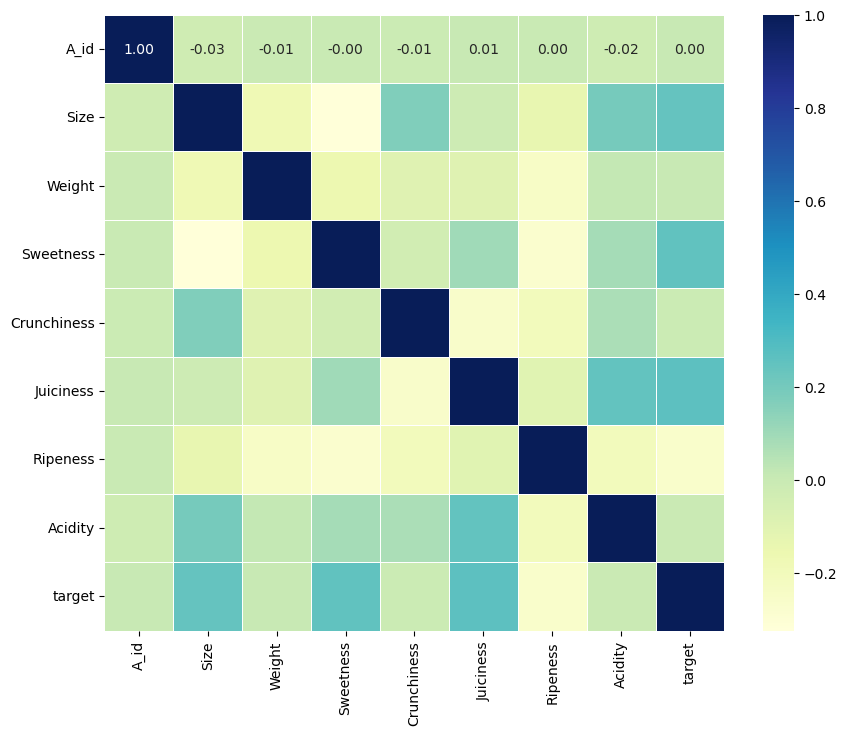

In [15]:
# data is your dataframe
c=apple.corr()
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(c,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu",ax=ax,annot_kws={"size":10})
plt.show()

In [16]:
# split into x and y
x=apple.drop(["target"],axis=1)
y=apple["target"]

In [17]:
x

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


In [18]:
y

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: target, Length: 4000, dtype: int32

import 3 different model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [20]:
#import train test split
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
#create a dictionary for models
models={"RandomForest":RandomForestClassifier(),
        "KNeighbors":KNeighborsClassifier(),
        "Linear":LinearRegression()}

In [23]:
# create a function for base score value of these three model
def base_model(model,x_train,x_test,y_train,y_test):
    model_score={}
    for label,model in model.items():
        model.fit(x_train,y_train)
        model_score[label]=model.score(x_test,y_test)
    return model_score

In [24]:
base_model_score=base_model(model=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

In [25]:
base_model_score

{'RandomForest': 0.8825, 'KNeighbors': 0.5475, 'Linear': 0.31073469431489376}

here the best performance in RandomForestClassifier got 87% accuracy.

the worst perform in Linear model got 27% accuracy

### Hyperturning in RandomizedSearchCV

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
grid={"n_estimators":[10,100,300,500,1000],
      "max_depth":[None,5,10,20],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,3,5]}

In [28]:
clf=RandomForestClassifier(n_jobs=1,random_state=42)

In [29]:
random=RandomizedSearchCV(clf,param_distributions=grid,n_iter=10,cv=5,verbose=True)
random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=1, random_state=42),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 300, 500,
                                                         1000]},
                   verbose=True)

In [30]:
# check the best param
random.best_params_

{'n_estimators': 300,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': None}

In [31]:
random.score(x_test,y_test)

0.88375

### Hyperturning in GridSearchCV

In [32]:
grid_2={"n_estimators":[100, 500],
        "min_samples_split": [2,4],
        "min_samples_leaf":[ 1,2],
        "max_depth":[5, 20]}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid=GridSearchCV(clf,param_grid=grid_2,cv=5,verbose=True)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1, random_state=42),
             param_grid={'max_depth': [5, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 500]},
             verbose=True)

In [35]:
grid.score(x_test,y_test)

0.8825

In [36]:
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [37]:
# import evaluation metrics
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score

In [38]:
def evaluation_score(y_true,y_pred):
    accuracy=accuracy_score(y_true,y_pred)
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    f1=f1_score(y_true,y_pred)
    dict_metrics={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"the accuracy score of the model:{accuracy*100:.2f}%")
    print(f"the precision score of the model:{precision}")
    print(f"the recall score of the model:{recall}")
    print(f"the f1 score of the model:{f1}")
    return dict_metrics

In [39]:
#check the metrics score of randomizedsearchcv
y_pred=random.predict(x_test)

In [40]:
random_metrics=evaluation_score(y_test,y_pred)

the accuracy score of the model:88.38%
the precision score of the model:0.8544600938967136
the recall score of the model:0.9215189873417722
the f1 score of the model:0.8867235079171742


In [41]:
random_metrics

{'accuracy': 0.88, 'precision': 0.85, 'recall': 0.92, 'f1': 0.89}

In [42]:
# import confusionmartix display
from sklearn.metrics import ConfusionMatrixDisplay

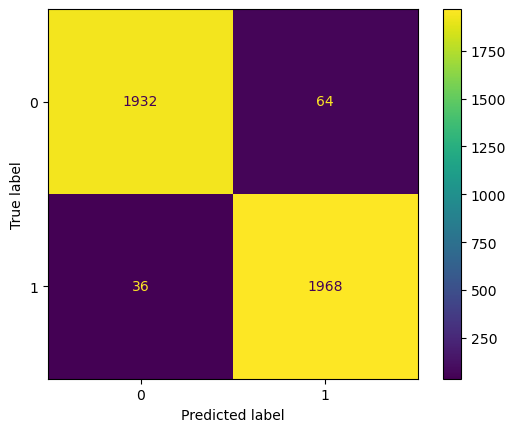

In [43]:
ConfusionMatrixDisplay.from_estimator(random,x,y)

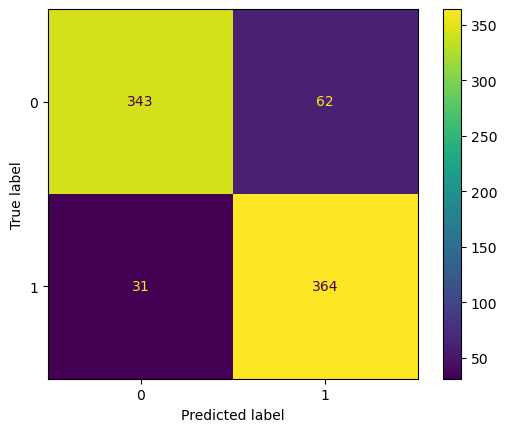

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [45]:
## check the metrics  score of  gridsearchcv
y_pred=grid.predict(x_test)

In [46]:
grid_metrics=evaluation_score(y_test,y_pred)

the accuracy score of the model:88.25%
the precision score of the model:0.8557919621749409
the recall score of the model:0.9164556962025316
the f1 score of the model:0.8850855745721271


In [47]:
grid_metrics

{'accuracy': 0.88, 'precision': 0.86, 'recall': 0.92, 'f1': 0.89}

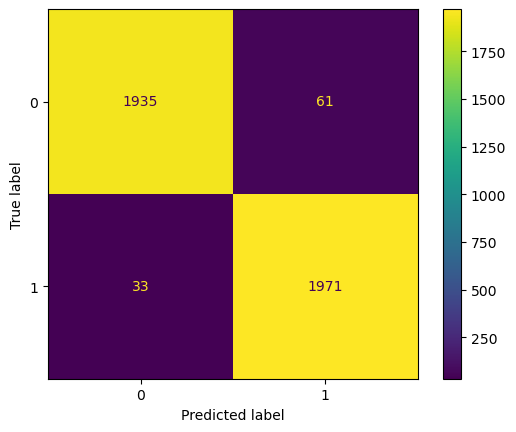

In [48]:
ConfusionMatrixDisplay.from_estimator(grid,x,y)

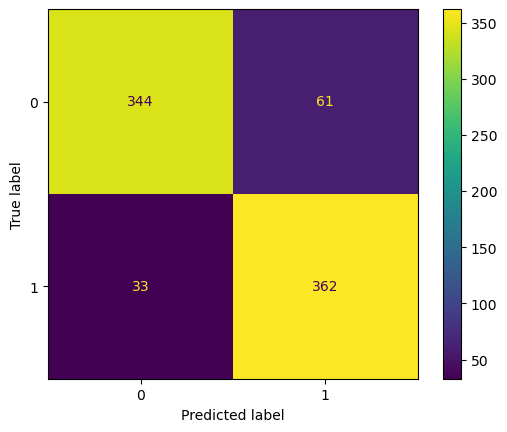

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

### the grid turning got only 89% accuracy only there no more turning chance to increase the accuracy

### save the model

In [50]:
from joblib import dump,load
dump(grid,filename="apple_quality_prediction_grid.joblib")

['apple_quality_prediction_grid.joblib']